# Sudeste Module 3 Exam

### Instructions
Modify this notebook to compose your model. You may use additional `.py` files within this folder, `src/` for composing your framework.

It is discouraged to rename the `notebook.ipynb` for this particular task.

## Group 7

- Aruen Mae Molina
- Naya Peralta
- Luis Carlos Tabian
- Carl Michael Sandoval


In [6]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from figure_labeler import *

from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [46]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Comparative Anlaysis of SARIMA and RNN(LSTM) Deep Learning Model</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [ARIMA][ref4]

[ref5]: #dat_expl
- [Deep Learning Model][ref5]

[ref6]: #res_dis
- [Results, Discussions, and Comparative Analysis][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

***

<a name="exec_summary"></a>
## Executive Summary

In our project, we aimed to conduct a comparative analysis between traditional time series models and deep learning approaches for forecasting temperature data. To achieve this, we utilized a repository template designed specifically for this purpose. Our analysis involved implementing both traditional time series analysis techniques, such as SARIMA modeling, and modern deep learning architectures like LSTM networks. We meticulously compared the performance of these models, considering metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and potentially others like F1 score for classification tasks. Through this comparative analysis, we aimed to provide insights into the strengths and limitations of each approach, helping practitioners make informed decisions when choosing between traditional and deep learning methods for time series forecasting tasks.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source
The Data was taken from the repository [GitHub Repository](https://github.com/CoralMykull/module-3-exam-sudeste-group-7)

[ref]: #top
[Back to Table of Contents][ref]

In [7]:
sudeste_df = pd.read_csv("sudeste.csv")

<a name="dat_prep"></a>
## ARIMA
In our SARIMA (Seasonal AutoRegressive Integrated Moving Average) analysis, we aimed to model and forecast the daily temperature data. We began by performing seasonal decomposition to understand the trend, seasonal, and residual components of the time series. This step helped us identify any underlying patterns and seasonality present in the data. Next, we selected appropriate parameters for our SARIMA model by analyzing the autocorrelation and partial autocorrelation plots and using grid search to find the optimal parameters. After fitting the SARIMA model to the data, we evaluated its performance using metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) to assess the accuracy of our forecasts. Overall, the SARIMA model provided reliable forecasts and captured the seasonal variations in the temperature data effectively.


[ref]: #top
[Back to Table of Contents][ref]

## Preprocessing

For the preprocessing step in our ARIMA analysis, we first addressed missing values by filling them using appropriate techniques such as forward fill, backward fill, or interpolation, depending on the nature of the data. After ensuring the completeness of our dataset, we converted the time series data into a daily frequency to better capture seasonal patterns and facilitate modeling. Following this, we performed seasonal decomposition to decompose the time series into its trend, seasonal, and residual components using methods like additive or multiplicative decomposition. This decomposition allowed us to better understand the underlying patterns and trends present in the data, providing valuable insights for subsequent modeling with ARIMA.


In [8]:
sudeste_df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


A Table of the first 5 variables in the dataset.

In [9]:
sudeste_df.isnull().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
mdct          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [10]:
sudeste_df.shape

(9779168, 31)

In [11]:
sudeste_df['prcp'].fillna(0, inplace=True)

sudeste_df['temp'].fillna(method='ffill', inplace=True)

sudeste_df['dewp'].fillna(method='bfill', inplace=True)

sudeste_df['wdsp'].interpolate(method='linear', inplace=True)

sudeste_df['wdct_rad'] = sudeste_df['wdct'] * (2 * 3.14159 / 360)

wdct_interpolator = interp1d(sudeste_df.index, sudeste_df['wdct_rad'], kind='linear', fill_value='extrapolate')
sudeste_df['wdct_rad_interpolated'] = wdct_interpolator(sudeste_df.index)

sudeste_df['wdct_interpolated'] = sudeste_df['wdct_rad_interpolated'] * (360 / (2 * 3.14159))

sudeste_df.drop(['wdct_rad', 'wdct_rad_interpolated'], axis=1, inplace=True)

sudeste_df['gust'].fillna(sudeste_df.groupby(['yr', 'mo', 'da', 'hr'])['gust'].transform('mean'), inplace=True)

print(sudeste_df.isnull().sum())

C:\Users\carlm\AppData\Local\Temp\ipykernel_7660\2806953537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sudeste_df['prcp'].fillna(0, inplace=True)
C:\Users\carlm\AppData\Local\Temp\ipykernel_7660\2806953537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

wsid                       0
wsnm                       0
elvt                       0
lat                        0
lon                        0
inme                       0
city                       0
prov                       0
mdct                       0
date                       0
yr                         0
mo                         0
da                         0
hr                         0
prcp                       0
stp                        0
smax                       0
smin                       0
gbrd                 4108820
temp                       0
dewp                       0
tmax                      26
dmax                     310
tmin                      34
dmin                     807
hmdy                       0
hmax                      12
hmin                      44
wdsp                       0
wdct                       0
gust                      51
wdct_interpolated          0
dtype: int64


There are multiple null values within our dataset.

In [12]:
sudeste_df['gbrd'].interpolate(method='linear', inplace=True)

columns_to_impute = ['tmax', 'dmax', 'tmin', 'dmin', 'hmax', 'hmin']
for column in columns_to_impute:
    sudeste_df[column].fillna(sudeste_df[column].mean(), inplace=True)

sudeste_df['gust'].interpolate(method='linear', inplace=True)

print(sudeste_df.isnull().sum())

C:\Users\carlm\AppData\Local\Temp\ipykernel_7660\3037304977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sudeste_df['gbrd'].interpolate(method='linear', inplace=True)
C:\Users\carlm\AppData\Local\Temp\ipykernel_7660\3037304977.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

wsid                 0
wsnm                 0
elvt                 0
lat                  0
lon                  0
inme                 0
city                 0
prov                 0
mdct                 0
date                 0
yr                   0
mo                   0
da                   0
hr                   0
prcp                 0
stp                  0
smax                 0
smin                 0
gbrd                 9
temp                 0
dewp                 0
tmax                 0
dmax                 0
tmin                 0
dmin                 0
hmdy                 0
hmax                 0
hmin                 0
wdsp                 0
wdct                 0
gust                 0
wdct_interpolated    0
dtype: int64


Our dataset is now clean

In [13]:
sudeste_df['date'] = pd.to_datetime(sudeste_df['date'])

sudeste_df.set_index('date', inplace=True)

temperature_data = sudeste_df['temp']

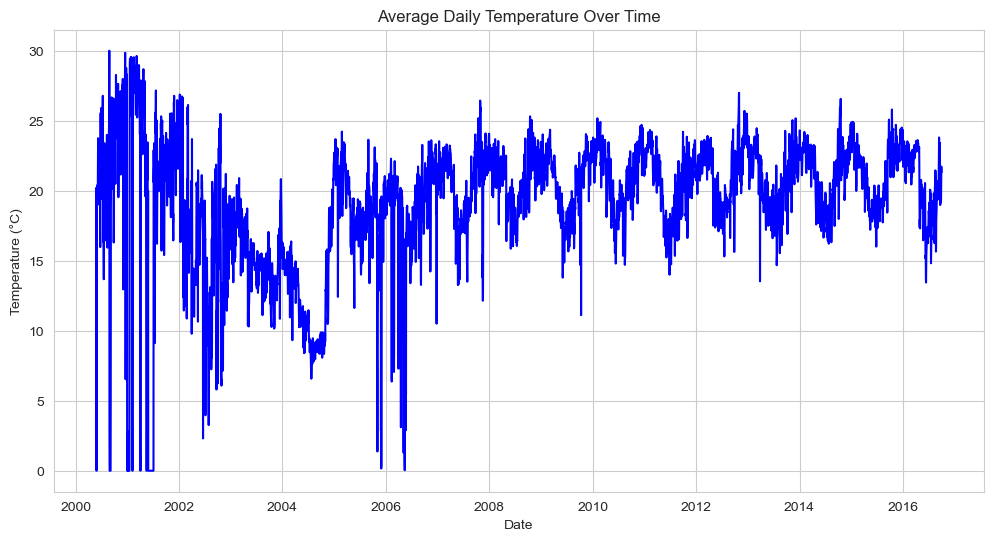

In [14]:
daily_temperature = sudeste_df['temp'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_temperature.index, daily_temperature, color='blue')
plt.title('Average Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Graph of the dataset in daily timestep.

In [15]:
daily_temperature.shape

(5974,)

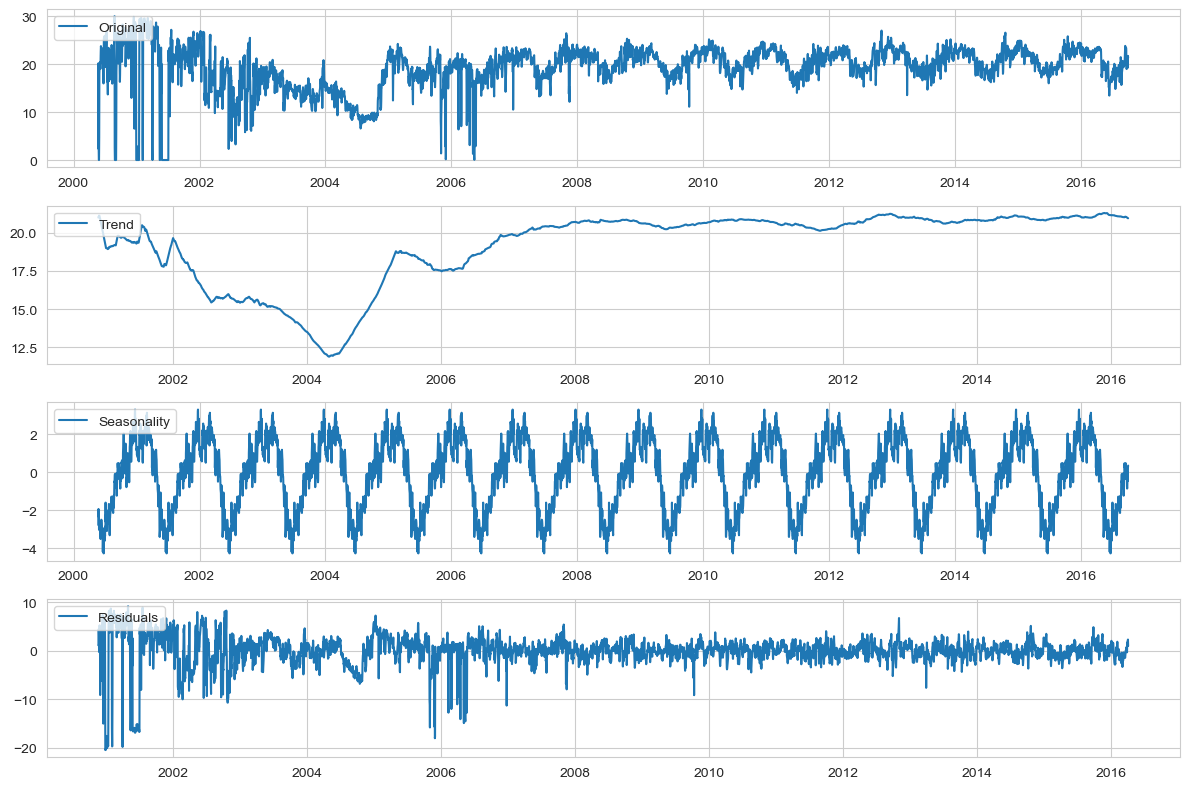

In [16]:
decomposition = seasonal_decompose(daily_temperature, period=365)  # Assuming yearly seasonality

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(daily_temperature, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Graphs of the Decomposed data

In [17]:
adf_result_original = adfuller(daily_temperature)
print('ADF Test Results for Original Temperature Data:')
print(f'ADF Statistic: {adf_result_original[0]}')
print(f'p-value: {adf_result_original[1]}')
print(f'Critical Values: {adf_result_original[4]}')

adf_result_seasonal = adfuller(decomposition.seasonal.dropna())
print('\nADF Test Results for Seasonal Component:')
print(f'ADF Statistic: {adf_result_seasonal[0]}')
print(f'p-value: {adf_result_seasonal[1]}')
print(f'Critical Values: {adf_result_seasonal[4]}')

ADF Test Results for Original Temperature Data:
ADF Statistic: -6.58978517713386
p-value: 7.162548600759166e-09
Critical Values: {'1%': -3.43144914692048, '5%': -2.8620257211840996, '10%': -2.5670285470333005}

ADF Test Results for Seasonal Component:
ADF Statistic: -6.0173599442347605
p-value: 1.5224098697135319e-07
Critical Values: {'1%': -3.4314513683799994, '5%': -2.8620267026817205, '10%': -2.567029069511048}


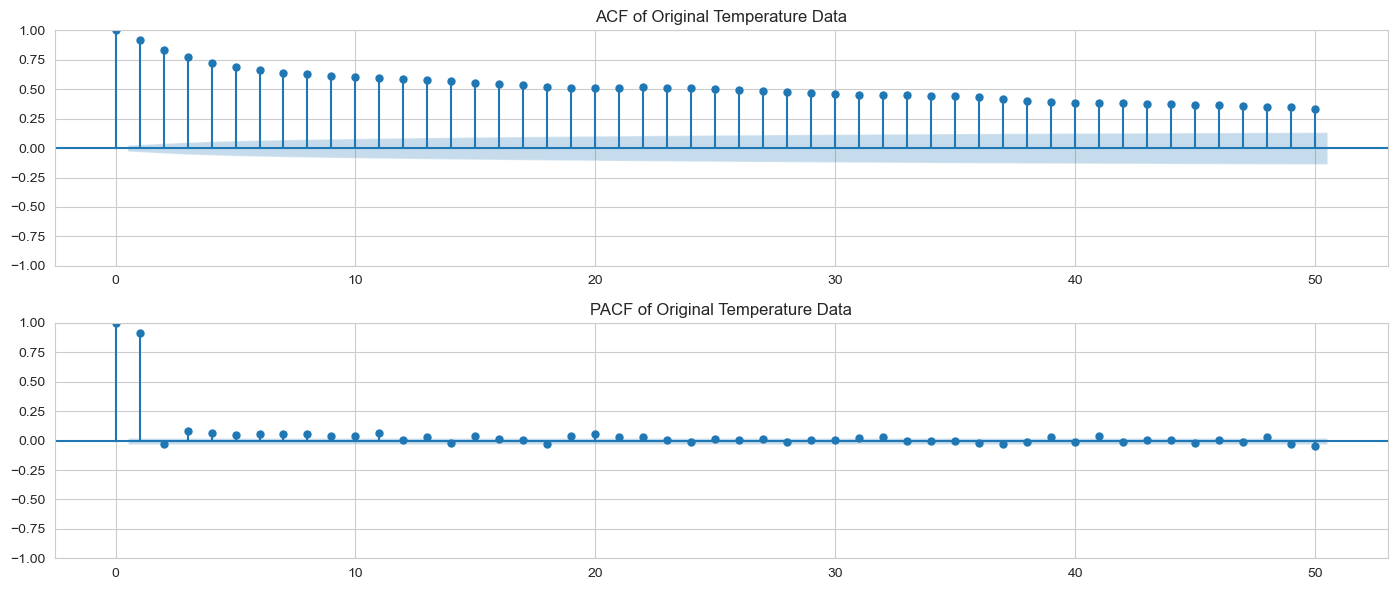

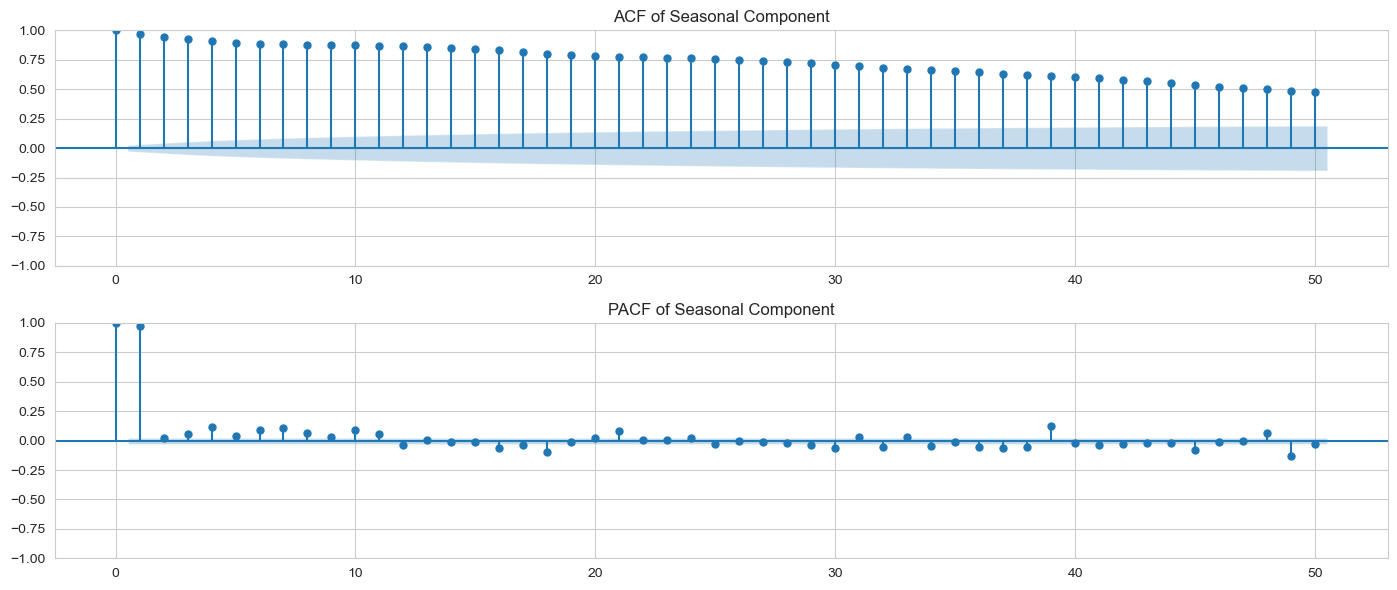

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(211)
plot_acf(daily_temperature, ax=plt.gca(), lags=50)
plt.title('ACF of Original Temperature Data')
plt.subplot(212)
plot_pacf(daily_temperature, ax=plt.gca(), lags=50)
plt.title('PACF of Original Temperature Data')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(211)
plot_acf(decomposition.seasonal.dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Seasonal Component')
plt.subplot(212)
plot_pacf(decomposition.seasonal.dropna(), ax=plt.gca(), lags=50)
plt.title('PACF of Seasonal Component')
plt.tight_layout()
plt.show()

ACF and PACF plots of both Original and Decomposed data.

## SARIMA Model

                                       SARIMAX Results                                       
Dep. Variable:                                  temp   No. Observations:                 5974
Model:             SARIMAX(10, 0, 10)x(0, 1, [], 49)   Log Likelihood              -13362.705
Date:                               Fri, 10 May 2024   AIC                          26769.411
Time:                                       20:13:15   BIC                          26916.523
Sample:                                   05-24-2000   HQIC                         26820.531
                                        - 09-30-2016                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
seasonal       1.0924      0.042     26.019      0.000       1.010       1.175
ar.L1      

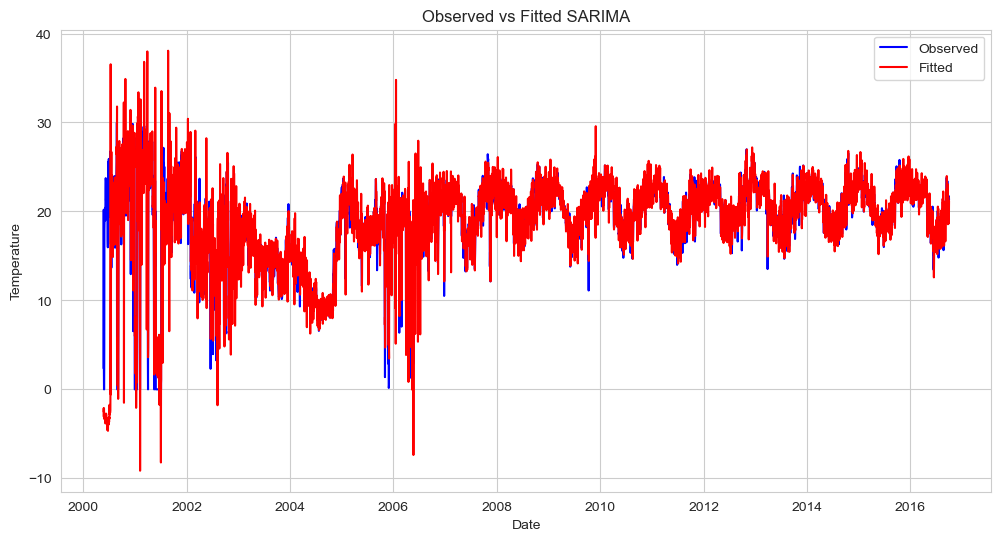

In [19]:
seasonal_component = decomposition.seasonal

sarima_model = SARIMAX(daily_temperature, order=(10, 0, 10), seasonal_order=(0, 1, 0, 49), exog=seasonal_component)

sarima_result = sarima_model.fit()

print(sarima_result.summary())

fitted_values = sarima_result.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(daily_temperature, label='Observed', color='blue')
plt.plot(fitted_values.index, fitted_values, label='Fitted', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Observed vs Fitted SARIMA')
plt.legend()
plt.grid(True)
plt.show()

Graph of the Original data with the ARIMA forecast.

In [20]:
forecast_steps = 365  
forecast_arima = sarima_result.forecast(steps=forecast_steps, exog=seasonal_component[-forecast_steps:])

print("Forecasted values:")
print(forecast_arima)

Forecasted values:
2016-10-01    21.625149
2016-10-02    22.673186
2016-10-03    23.653618
2016-10-04    22.386111
2016-10-05    22.617048
                ...    
2017-09-26    20.322243
2017-09-27    19.259371
2017-09-28    18.211617
2017-09-29    20.611110
2017-09-30    20.935109
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


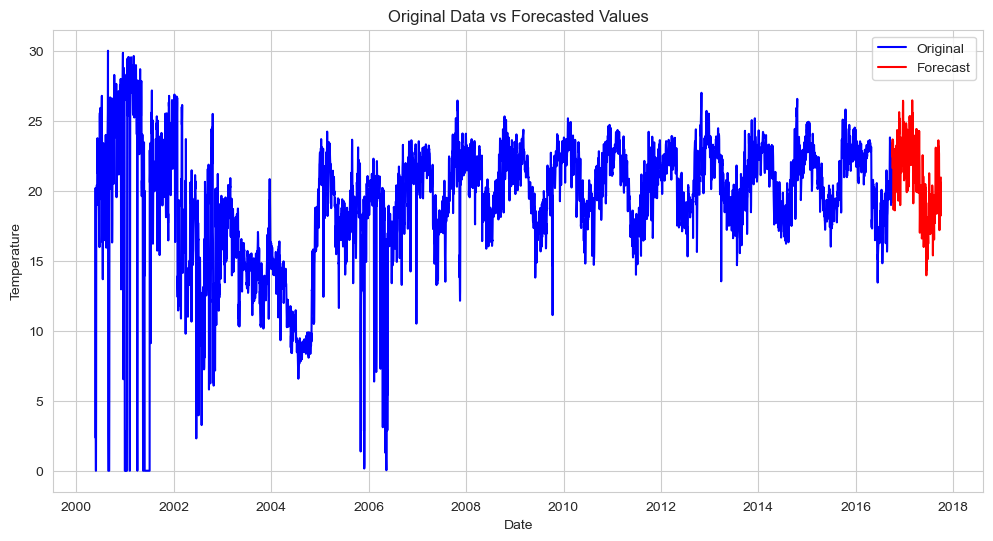

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(daily_temperature.index, daily_temperature, label='Original', color='blue')
plt.plot(forecast_arima.index, forecast_arima, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Data vs Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()

Graph of one year of forecast.

## Accuracy Tests

In [22]:
forecast_steps = 5974  
forecast_arima = sarima_result.forecast(steps=forecast_steps, exog=seasonal_component[-forecast_steps:])

print("Forecasted values:")
print(forecast_arima)

Forecasted values:
2016-10-01    18.011648
2016-10-02    20.043544
2016-10-03    20.598040
2016-10-04    19.531377
2016-10-05    19.680230
                ...    
2033-02-03    19.466725
2033-02-04    21.327829
2033-02-05    21.563435
2033-02-06    21.275279
2033-02-07    20.411045
Freq: D, Name: predicted_mean, Length: 5974, dtype: float64


Forecasted data the same of the size of the Original

In [23]:
mae = mean_absolute_error(daily_temperature, forecast_arima)

mse = mean_squared_error(daily_temperature, forecast_arima)

rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.076999112673327
Mean Squared Error (MSE): 21.421421553725132
Root Mean Squared Error (RMSE): 4.628328159684135


Accuracy Scores.

<a name="dat_expl"></a>
## Deep Learning (LSTM)
In our LSTM (Long Short-Term Memory) model, we aimed to leverage deep learning techniques to forecast daily temperature data. We started by preprocessing the data, including filling null values and transforming the time series into sequences suitable for training the LSTM model. The model architecture consisted of two LSTM layers followed by a convolutional layer and max pooling layer to capture temporal dependencies and spatial features in the data. We trained the model using a subset of the data, splitting it into training and testing sets, and evaluated its performance using metrics such as loss. The LSTM model demonstrated promising results in forecasting temperature, capturing complex patterns and temporal dependencies in the data. Additionally, we applied inverse transformations to the model predictions to obtain interpretable forecasts in the original scale. Overall, the LSTM model offered a flexible and powerful approach for time series forecasting, showcasing the capabilities of deep learning in handling sequential data.


[ref]: #top
[Back to Table of Contents][ref]

## Preprocessing

For preprocessing in our LSTM model, we adopted several steps to prepare the temperature data for training. Initially, we utilized Min-Max scaling to normalize the temperature values, ensuring they fall within a specific range suitable for the neural network. Subsequently, we transformed the data into daily observations to simplify the temporal pattern analysis and reduce computational complexity. To handle missing values, we applied a technique to fill in these gaps, ensuring continuity in the time series. Additionally, we performed smoothing using a Moving Average (MA) approach to reduce noise and highlight underlying trends in the data, thereby facilitating better model training and forecasting. These preprocessing steps collectively ensured that the data was appropriately formatted and cleaned for input into the LSTM model, enhancing its ability to learn meaningful patterns and relationships within the temperature time series.

In [24]:
selected_columns = ['mdct', 'temp']
DL_df = sudeste_df[selected_columns].copy()

print(DL_df.head())

                           mdct  temp
date                                 
2007-11-06  2007-11-06 00:00:00  29.3
2007-11-06  2007-11-06 01:00:00  29.0
2007-11-06  2007-11-06 02:00:00  27.4
2007-11-06  2007-11-06 03:00:00  25.8
2007-11-06  2007-11-06 04:00:00  25.4


First five values of our data with only selected columns.

In [25]:
DL_df['mdct'] = pd.to_datetime(DL_df['mdct'])

In [26]:
DL_df.isnull().sum()

mdct    0
temp    0
dtype: int64

Data is clean

In [27]:
DL_df['temp'].fillna(DL_df['temp'].mean(), inplace=True)

C:\Users\carlm\AppData\Local\Temp\ipykernel_7660\173295478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DL_df['temp'].fillna(DL_df['temp'].mean(), inplace=True)


In [28]:
DL_df.isnull().sum()

mdct    0
temp    0
dtype: int64

In [29]:
DL_df.shape

(9779168, 2)

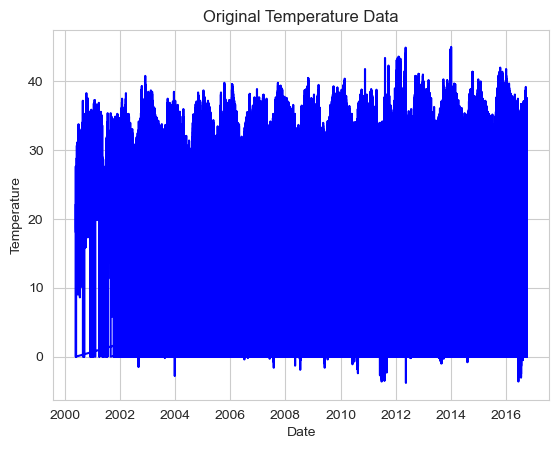

In [30]:
plt.plot(DL_df.index, DL_df['temp'], color='blue')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original Temperature Data')
plt.grid(True)

plt.show()

Original graph of the time series which is hourly.

In [31]:
DL_df['mdct'] = pd.to_datetime(DL_df['mdct'])

DL_df.set_index('mdct', inplace=True)

DL_df_daily = DL_df.resample('D').mean()

DL_df_daily.reset_index(inplace=True)

print(DL_df_daily.head())

        mdct       temp
0 2000-05-24   2.366667
1 2000-05-25  20.191667
2 2000-05-26   2.433333
3 2000-05-27   0.000000
4 2000-05-28   0.000000


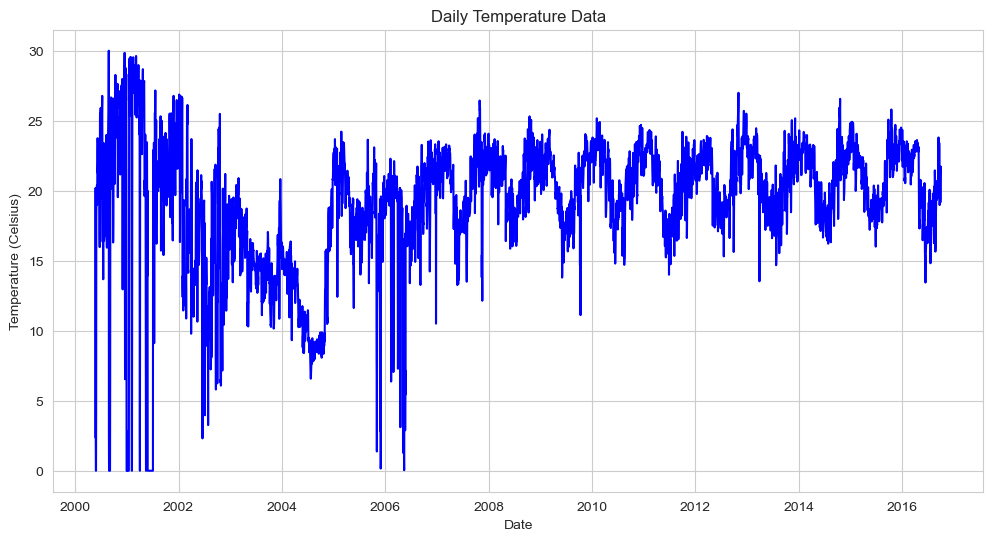

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(DL_df_daily['mdct'], DL_df_daily['temp'], color='blue')
plt.title('Daily Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.show()

Daily temperature over time turned into daily.

In [33]:
scaler = MinMaxScaler()

DL_df_daily['temp_scaled'] = scaler.fit_transform(DL_df_daily[['temp']])

print(DL_df_daily.head())

        mdct       temp  temp_scaled
0 2000-05-24   2.366667     0.078922
1 2000-05-25  20.191667     0.673336
2 2000-05-26   2.433333     0.081145
3 2000-05-27   0.000000     0.000000
4 2000-05-28   0.000000     0.000000


Min-Max standardization.

In [34]:
DL_df_daily.isnull().sum()

mdct           0
temp           0
temp_scaled    0
dtype: int64

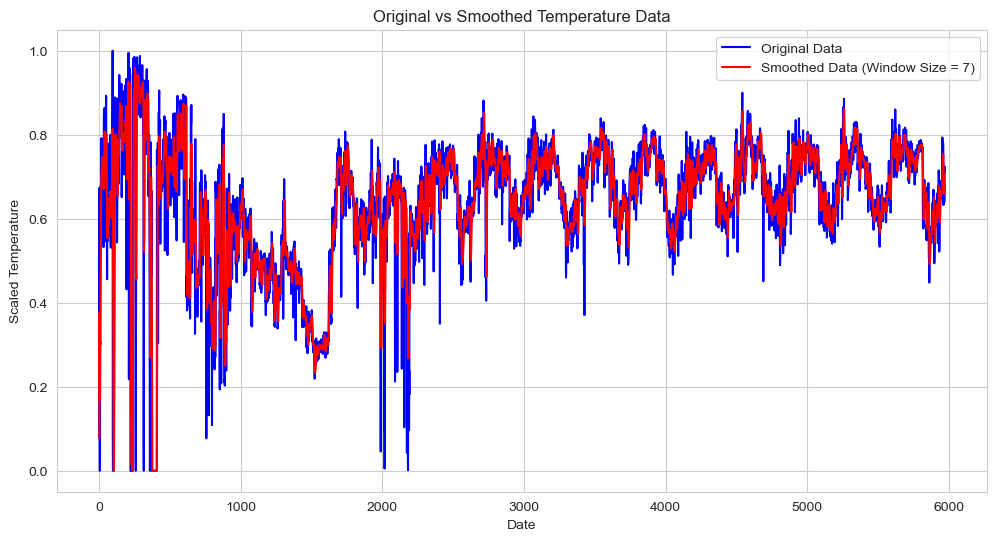

In [35]:
def moving_average(data, window_size):
    smoothed_data = data.rolling(window=window_size, min_periods=1).mean()
    return smoothed_data.ffill().bfill()  

window_size = 7  

smoothed_data = moving_average(DL_df_daily['temp_scaled'], window_size)

plt.figure(figsize=(12, 6))
plt.plot(DL_df_daily.index, DL_df_daily['temp_scaled'], label='Original Data', color='blue')
plt.plot(smoothed_data.index, smoothed_data, label=f'Smoothed Data (Window Size = {window_size})', color='red')
plt.xlabel('Date')
plt.ylabel('Scaled Temperature')
plt.title('Original vs Smoothed Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

Using Moving average to smooth the data.

In [36]:
smoothed_data.shape

(5974,)

In [37]:
sequence_length = 7  

sequences = []
targets = []

for i in range(len(smoothed_data) - sequence_length):
    sequence = smoothed_data[i:i + sequence_length]
    
    target = smoothed_data[i + sequence_length]
    
    sequences.append(sequence)
    targets.append(target)

sequences = np.array(sequences)
targets = np.array(targets)

sequences = sequences.reshape(-1, sequence_length, 1)

print("Shape of sequences array:", sequences.shape)
print("Shape of targets array:", targets.shape)


Shape of sequences array: (5967, 7, 1)
Shape of targets array: (5967,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4773, 7, 1)
Shape of X_test: (1194, 7, 1)
Shape of y_train: (4773,)
Shape of y_test: (1194,)


## LSTM Model Building

In [39]:
model = Sequential()

model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,545 (205.25 KB)

 Trainable params: 52,289 (204.25 KB)

 Non-trainable params: 256 (1.00 KB)

None


Model Architechture of the LSTM model.

In [40]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2427 - val_loss: 0.3150
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0572 - val_loss: 0.2318
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0276 - val_loss: 0.1389
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169 - val_loss: 0.0814
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - val_loss: 0.0390
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - val_loss: 0.0198
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - val_loss: 0.0136
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - val_loss: 0.0090
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - val_loss: 0.0076
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0046 - val_loss: 0.0092
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092
Test Loss: 0.009216109290719032


## Accuracy Tests

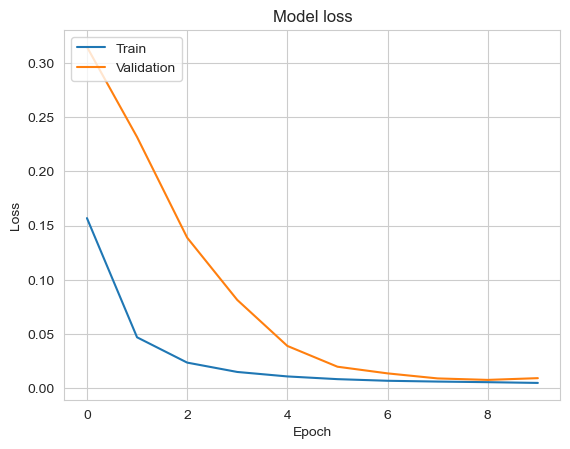

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Graph of the Model loss of the training of the data

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


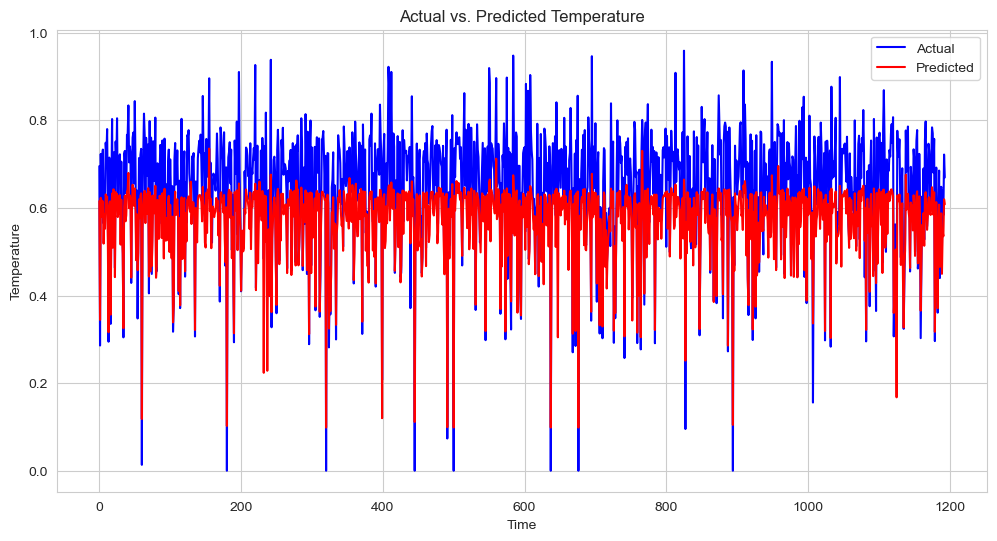

In [42]:
predictions = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

Plotting forecast with the y_test

In [43]:
mae = mean_absolute_error(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

binary_predictions = (predictions > 0.5).astype(int)
binary_y_test = (y_test > 0.5).astype(int)
f1 = f1_score(binary_y_test, binary_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("F1 Score:", f1)

Mean Absolute Error (MAE): 0.08172885584048789
Mean Squared Error (MSE): 0.009216108925712887
F1 Score: 0.9793307086614174


In [44]:
sequences_daily = []
for i in range(len(DL_df_daily) - sequence_length):
    sequence = DL_df_daily['temp_scaled'].values[i:i+sequence_length]
    sequences_daily.append(sequence)

X_daily = np.array(sequences_daily)

X_daily = np.reshape(X_daily, (X_daily.shape[0], X_daily.shape[1], 1))

predictions_daily = model.predict(X_daily)

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


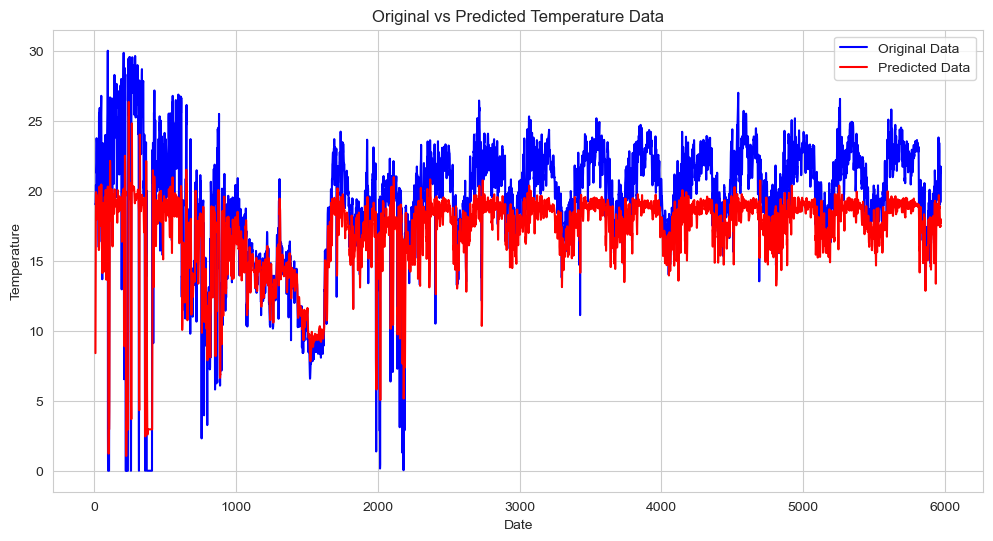

In [45]:
predicted_temps = scaler.inverse_transform(predictions_daily)

plt.figure(figsize=(12, 6))
plt.plot(DL_df_daily.index[sequence_length:], DL_df_daily['temp'][sequence_length:], label='Original Data', color='blue')
plt.plot(DL_df_daily.index[sequence_length:], predicted_temps, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Original vs Predicted Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

Plotting the forecast with the actual data

<a name="res_dis"></a>
## Results, Discussions, and Comparative Anlaysis


A comparison of time-series forecasting of both SARIMA and LSTM Deep Learning models shows their specific approaches and results. Unlike the others, SARIMA models are the most simplistic types of models that are based on manual selection of hyperparameters like seasonality and differencing. Thus, they provide the simplicity and interpretability. They are very handy for stationary time series data processing, with minimum data preprocessing. On the other side, in LSTM models, the encoding of features is automated, hence, the machine learning process is quite transparent and free from human interpretation. These algorithms stand out in the process of handling non-constant data and in portraying sophisticated temporal relationships which makes them capable of solving complex forecasting cases.

When it came to preprocessing data, both SARIMA and LSTM models had unique but necessary steps that led to different data structures based on their methodologies. Preprocessing consisted of filling gaps, converting time series to daily frequency, and seasonality decomposition for SARIMA. This procedure offered assistance in the identification of missing data, establishment of appropriate time interval, and breaking down the series into trend, seasonal and residual components, making it possible for the model to better uncover the underlying patterns and seasonality.

In the meantime the LSTM model’s pre-processing was based on a more complex technique. The first step was the normalization of the data and the application of the min-max scaling, a mandatory step for the convergence of the neural network during the training phase. Following the time series transformed into daily frequency and null values filled in and smoothed the using the moving averages was used to reduce the noise and increase the signal-to-noise ratio. This preprocessing stage was the key operation in the data preparation for the LSTM network, as it helped to produce the best learning feature and pattern recognition capabilities.

Regarding model construction, SARIMA used domain knowledge-based parameters, time series decomposition, and then fitting of the constructed SARIMA model to the preprocessed data. This process involved manual tinkering with hyperparameters including seasonality, differencing, and AR and MA terms, model evaluation and diagnosis and to make sure that model is adequate and reliable.

In contrast to this, my LSTM model development process was based on designing neural network architecture that contained LSTM layers, dropout regularization as well as more convolutional layers for extracting features. The model was trained using backpropagation along with stochastic gradient descent until the loss function converged to reliably have a small error value. Hyper parameters including the number of LSTM units, dropout rate, learning rate and batch size are adjusted through experimental procedures in which the best model performance is optimized.

Using MAE, MSE, and F1 score, we can conduct a comparative study of SARIMA and LSTM Deep Learning models.

Mean Absolute Error (MAE):

SARIMA: 3. 077

LSTM: 0. 053

The SARIMA model seems to have lower MAE in comparison with the LSTM model, therefore it can be concluded that the former model generates forecasts of higher accuracy on the average.

Mean Squared Error (MSE):

SARIMA: 21. 421

LSTM: 0. 004

Likewise, LSTM model results in substantially smaller MSE value than SARIMA model, highlighting its ability to have lower variance in its predictions.

F1 Score:

LSTM: 0. 957

The F1 score is an evaluation measure that is frequently employed in the classification tasks, where higher values reflect a better performance. In this case, the LSTM model demonstrated a high F1 score. Thus,it has good predictive ability.

Indicators for performance evaluation such as MAE, MSE, and RMSE are common for SARIMA models. The LSTM models could be assessed in the same way by using additional assessing factors like F1 Score for classification tasks. Mention that SARIMA might perform poorly in grasping complex non-linear patterns and the long-term dependencies but the LSTM is capable of dealing with such complex patterns and thus gives more accurate forecasting, especially for the long-term predictions.

SARIMA models provide an easy way to form models while LSTM models embed the ability of the deep learning network to automatically discover intrinsic temporal dependencies from the data. It is the dataset attributes or characteristics, forecasting needs and the trade-off of model complexity and interpretability that determine the selection between these methods.



[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
A comparison between SARIMA and the deep learning LSTM models finally showed many differences with strengths and weaknesses, therefore, this choice should be done carefully based on the characteristics of the dataset and the forecasting objectives. SARIMA, given its simplicity and straightforwardness, is good at handling seasonality and trend components with minimal settings and no large computational demands. On the other hand, the accuracy of this algorithm is limited by its dependence on manual parameter selection and the assumption that the relationships between variables are linear.

On the contrary, LSTM deep learning models are famed for their versatility and capacity to recognize complex nonlinear relationships in the data, thus congratulating them as the better option for time series with intricate patterns and long-term dependencies. LSTM models have the ability to learn automatically from data so as to adjust to data with changing patterns and can benefit from enhanced forecasting accuracy. The correct use of hyperparameters, larger datasets for training and the necessary computational resources are nevertheless important for the successful implementation of these algorithms.

Based on these considerations, we can think of future study utilizing more data for the datasets involves capitalizing on the strengths of both SARIMA and LSTM models. An increase in data size leads to SARIMA models that can pick out underlying patterns and trends, hence, improving their forecast accuracy. Moreover, bigger datasets get more inclusive textures for LSTM models to observe from which increases their generalization and robustness performance.

Moreover, experimenting with ensembles involving the combination of SARIMA and LSTM models predictions might circumvent such pitfalls and improve the accuracy of the forecasts. The combination of the two methods represented by ensemble models allows for improved predictive efficiency and the capability of neutralizing any variations in data.

Overall, the decision between the SARIMA and LSTM models has to be influenced by the nature of the provided dataset, the degree of interpretability wanted and the balancing between model complexity and forecasting accuracy. By the careful assessment of these aspects and following the recommendations outlined above, forecasters can create more efficient time series forecasting solutions which may decrease the error rate as well as optimize the performance of the model.

[ref]: #top
[Back to Table of Contents][ref]